In [4]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.efficientnet_v2 import EfficientNetV2B0
from keras import layers, models

In [5]:
# Define paths to your dataset
train_data_dir = './train/'
test_data_dir = './test/'
val_data_dir = './val/'

In [6]:
# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 15

In [7]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2149 images belonging to 2 classes.
Found 272 images belonging to 2 classes.
Found 268 images belonging to 2 classes.


In [9]:
# Load EffecientNetV2 pre-trained model
base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))



24274472/24274472 [==============================] - 6s 0us/step


In [10]:
# Freeze the convolutional layers
base_model.trainable = False

In [11]:
# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Functio  (None, 7, 7, 1280)        5919312   
 nal)                                                            
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 5920593 (22.59 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [14]:
model.save('effecientnetv2.h5')

c:\Users\prans\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Epoch 1/15

34/34 [==============================] - 103s 3s/step - loss: 0.6953 - accuracy: 0.5086 - val_loss: 0.6937 - val_accuracy: 0.4813
Epoch 2/15
34/34 [==============================] - 92s 3s/step - loss: 0.6947 - accuracy: 0.5170 - val_loss: 0.6937 - val_accuracy: 0.5336
Epoch 3/15
34/34 [==============================] - 95s 3s/step - loss: 0.6923 - accuracy: 0.5254 - val_loss: 0.6925 - val_accuracy: 0.5336
Epoch 4/15
34/34 [==============================] - 109s 3s/step - loss: 0.6910 - accuracy: 0.5314 - val_loss: 0.6970 - val_accuracy: 0.5336
Epoch 5/15
34/34 [==============================] - 86s 3s/step - loss: 0.6929 - accuracy: 0.5230 - val_loss: 0.7093 - val_accuracy: 0.5336
Epoch 6/15
34/34 [==============================] - 70s 2s/step - loss: 0.6938 - accuracy: 0.5216 - val_loss: 0.6938 - val_accuracy: 0.4664
Epoch 7/15
34/34 [==============================] - 57s 2s/step - loss: 0.6963 - accuracy: 0.5035 - val_loss: 0.6894 - val_accuracy: 0.5336
Epoch 8/15
34/34 

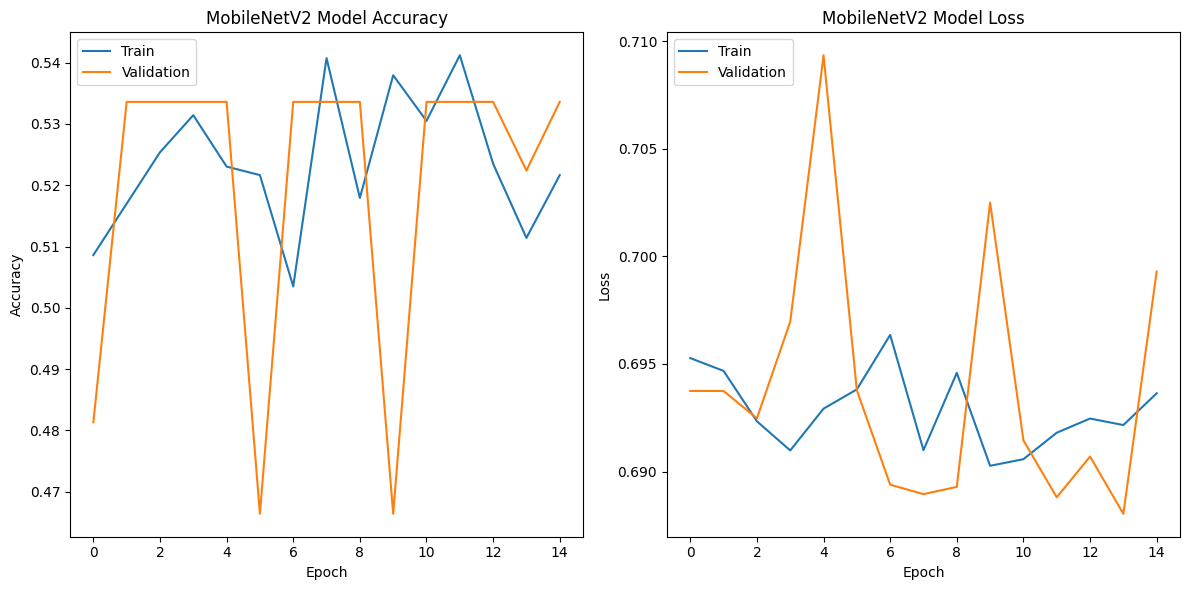

In [16]:
# Plot the training and validation curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('EfficientNet Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Efficient Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [17]:
batch_size = 32
epochs = 10

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)


Found 2149 images belonging to 2 classes.
Found 272 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Functio  (None, 7, 7, 1280)        5919312   
 nal)                                                            
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 5920593 (22.59 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________
Epoch 1/10

68/68 [==

In [19]:
import tensorflow as tf
from keras.applications import EfficientNetB0
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model
from keras.optimizers import Adam


# Load EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False)

# Modify for your task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator)


# Fine-tuning
base_model.trainable = True
fine_tune_at = 100  # This is the number of layers from the top to fine-tune

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Continue training
fine_tune_epochs = 10
total_epochs = 10 + fine_tune_epochs

history_fine = model.fit(
    train_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=val_generator)

# # Plotting
# plt.figure(1)

# # Plot training & validation accuracy values
# plt.subplot(211)
# plt.plot(history.history['accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')

# # Plot training & validation loss values
# plt.subplot(212)
# plt.plot(history.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')

# plt.tight_layout()
# plt.show()


Epoch 1/10
68/68 [==============================] - 220s 3s/step - loss: 0.5031 - accuracy: 0.7725 - val_loss: 0.6943 - val_accuracy: 0.5336
Epoch 2/10
68/68 [==============================] - 202s 3s/step - loss: 0.1523 - accuracy: 0.9604 - val_loss: 0.6957 - val_accuracy: 0.4701
Epoch 3/10
62/68 [==========================>...] - ETA: 16s - loss: 0.0443 - accuracy: 0.9888

KeyboardInterrupt: 

In [20]:
from keras.applications.efficientnet_v2 import EfficientNetV2B1
batch_size = 64
epochs = 5

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = EfficientNetV2B1(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Found 2149 images belonging to 2 classes.
Found 272 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
28456008/28456008 [==============================] - 6s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b1 (Functio  (None, 7, 7, 1280)        6931124   
 nal)                                                            
                                                                 
 global_average_pooling2d_4  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 6932405 (26.45 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 6931124 (26.44 MB)
______________________

KeyboardInterrupt: 

In [ ]:
from keras.applications.efficientnet_v2 import EfficientNetV2B2
batch_size = 64
epochs = 5

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = EfficientNetV2B2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

In [ ]:
from keras.applications.efficientnet_v2 import EfficientNetV2B3
batch_size = 64
epochs = 5

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = EfficientNetV2B3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

In [ ]:
from keras.applications.efficientnet_v2 import EfficientNetV2B4
batch_size = 64
epochs = 5

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = EfficientNetV2B4(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

In [21]:
from keras.applications.efficientnet_v2 import EfficientNetV2S
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models

# Define paths to your dataset
train_data_dir = './train'
test_data_dir = './test'
val_data_dir = './val'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 15

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load EffecientNetV2 pre-trained model
base_model = EfficientNetV2S(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Found 2149 images belonging to 2 classes.
Found 272 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
82420632/82420632 [==============================] - 15s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Function  (None, 7, 7, 1280)        20331360  
 al)                                                             
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_7 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 20332641 (77.56 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 20331360 (77.56 MB)
___________________